In [ ]:
#merge microglia datasets

In [1]:
import scanpy as sc
import pandas as pd
import re
import numpy as np
import anndata as ads

In [2]:
adata1 = sc.read_h5ad("/mnt/data/mit_pfc_mathysCell2023/PFC_micro.h5ad")
adata2 = sc.read_h5ad("/mnt/data/seaad_dlpfc/seaad_microglia.h5ad")
adata3 = sc.read_h5ad("/home/ubuntu/human_PFC/dejaeg_preprocessing/microglia_filt.h5ad")

In [3]:
# give each one a name
adata1.obs["dataset"] = "MIT_ROSMAP"
adata2.obs["dataset"] = "SEAAD"
adata3.obs["dataset"] = "FUJITA"

In [5]:


# Make pandas show all columns
pd.set_option("display.max_columns", None)

print("adata1:")
print(adata1.obs.columns.tolist())  # list format is easier to scan
print("\nadata2:")
print(adata2.obs.columns.tolist())
print("\nadata3:")
print(adata3.obs.columns.tolist())

# (optional) reset back to default
pd.reset_option("display.max_columns")


adata1:
['projid', 'individualID_x', 'cell_type_high_resolution', 'major_cell_type', 'barcode', 'batch', 'chemistry', 'individualID_y', 'individualID', 'individualIdSource', 'species', 'sex', 'subject', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'n_genes', 'doublet_scores', 'predicted_doublets', 'celltypist_cell_label', 'celltypist_conf_score', 'celltypist_simplified']

adata2:
['sample_id', 'Neurotypical reference', 'Donor ID', 'Organism', 'Brain Region', 'Sex', 'Gender', 'Age at Death', 'Race (choice

SEAAD: 
- 'Donor ID' = 'individualID'
- 'Sex' = 'sex'
- 'PMI' = 'pmi'
- 'Hispanic_Latino' = 'spanish'
- 'Braak' = 'braaksc'
- 'CERAD score' = 'ceradsc'
- 'Years of education' = educ
- 'Race' = 'race'
- 'APOE Genotype' = 'apoe_genotype'
- 'Age at Death' = 'age_death'
cogdx (adata1,3), Cognitive Status (adata2)

In [5]:
# Make pandas show all columns
pd.set_option("display.max_columns", None)

print("sex")
print("adata1:")
print(adata1.obs['sex'].unique().tolist())  # list format is easier to scan
print("\nadata2:")
print(adata2.obs['Sex'].unique().tolist())
print("\nadata3:")
print(adata3.obs['msex'].unique().tolist())


print("apoe genotype")
print("adata1:")
print(adata1.obs['apoe_genotype'].unique().tolist())  # list format is easier to scan
print("\nadata2:")
print(adata2.obs['APOE Genotype'].unique().tolist())
print("\nadata3:")
print(adata3.obs['apoe_genotype'].unique().tolist())

print("braak")
print("adata1:")
print(adata1.obs['braaksc'].unique().tolist())  # list format is easier to scan
print("\nadata2:")
print(adata2.obs['Braak'].unique().tolist())
print("\nadata3:")
print(adata3.obs['braaksc'].unique().tolist())


print("cerad")
print("adata1:")
print(adata1.obs['ceradsc'].unique().tolist())  # list format is easier to scan
print("\nadata2:")
print(adata2.obs['CERAD score'].unique().tolist())
print("\nadata3:")
print(adata3.obs['ceradsc'].unique().tolist())


print("AGE")
print("adata1:")
print(adata1.obs['age_death'].unique().tolist())  # list format is easier to scan
print("\nadata2:")
print(adata2.obs['Age at Death'].unique().tolist())
print("\nadata3:")
print(adata3.obs['age_death'].unique().tolist())

print("educ")
print("adata1:")
print(adata1.obs['educ'].unique().tolist())  # list format is easier to scan
print("\nadata2:")
print(adata2.obs['Years of education'].unique().tolist())
print("\nadata3:")
print(adata3.obs['educ'].unique().tolist())

print("pmi")
print("adata1:")
print(adata1.obs['pmi'].unique().tolist())  # list format is easier to scan
print("\nadata2:")
print(adata2.obs['PMI'].unique().tolist())
print("\nadata3:")
print(adata3.obs['pmi'].unique().tolist())



# (optional) reset back to default
pd.reset_option("display.max_columns")

sex
adata1:
['male', 'female']

adata2:
['Male', 'Female']

adata3:
[1.0, 0.0]
apoe genotype
adata1:
[34.0, 44.0, 33.0]

adata2:
['4/4', '3/3', '3/4']

adata3:
[33.0, 34.0, 44.0]
braak
adata1:
[3.0, 5.0, 2.0, 1.0, 4.0, 6.0, 0.0]

adata2:
['Braak VI', 'Braak 0', 'Braak IV', 'Braak V', 'Braak II', 'Braak III']

adata3:
[4.0, 3.0, 5.0, 1.0, 2.0, 0.0, 6.0]
cerad
adata1:
[4.0, 2.0, 1.0, 3.0]

adata2:
['Frequent', 'Absent', 'Sparse', 'Moderate']

adata3:
[2.0, 4.0, 1.0, 3.0]
AGE
adata1:
['88.399726214921287', '88.468172484599592', '74.773442847364819', '79.534565366187536', '90+', '79.115674195756327', '84.988364134154693', '85.776865160848729', '76.884325804243673', '83.728952772073924', '89.713894592744694', '82.710472279260784', '81.67556468172485', '83.635865845311429', '80.94455852156058', '87.509924709103359', '87.449691991786452', '86.269678302532512', '87.665982203969889', '87.238877481177269', '83.496235455167692', '87.953456536618759', '86.603696098562622', '75.978097193702936', '7

In [6]:
# Now investigating what batches are across datasets 

print("batch")
print("adata1:")
print(adata1.obs['batch'].unique().tolist())  # list format is easier to scan
print("\nadata2:") #sample_id / sample_name / load_name
#print(adata2.obs['sample_id'].unique().tolist())
#print(adata2.obs['sample_name'].unique().tolist())
print(adata2.obs['load_name'].unique().tolist())
print("\nadata3:")
print(adata3.obs['batch'].unique().tolist())

batch
adata1:
['171013Tsa', '190312Tsa', 'Brain_region_PFC', 'GZQRZ', 'GZQS1', 'IHLAS', 'IT6MD', 'IT6ME', 'IVA6E', 'IXFTQ', 'IXFTR', 'IXFTU', 'J2CJI', 'J2CJJ', 'Last16']

adata2:
['763_H06', '683_G04', '1073_H02', '696_D02', '815_F04', '984_B04', '1065_A04', '815_E04', '1073_G02', '696_H02', '1065_B04', '1029_A07', '832_C02', '678_G01', '763_B06', '882_C02', '705_A01', '660_E01', '665_F02', '678_B01', '845_C01', '832_F02', '1029_B07', '1135_A01', '687_H01', '768_D01', '665_E02', '826_E04', '808_A01', '804_C04', '1070_C01', '696_B02', '768_C01', '1073_B02', '669_D01', '763_C06', '984_A04', '804_D04', '826_G04', '783_E02', '946_C02', '1087_C02', '826_H04', '669_F01', '678_C01', '832_B02', '687_G01', '832_A02', '656_D05', '763_E06', '1085_B01', '768_G01', '851_D04', '656_B05', '794_D04', '669_B01', '660_G01', '660_H01', '1085_A01', '845_D01', '826_F04', '669_G01', '856_D01', '665_H02', '656_C05', '763_G06', '763_F06', '851_C04', '1101_C01', '678_D01', '826_A04', '820_A01', '882_A02', '826

In [7]:
adata2.obs['batch'] = adata2.obs['load_name']
print(adata2.obs['batch'].unique().tolist())

['763_H06', '683_G04', '1073_H02', '696_D02', '815_F04', '984_B04', '1065_A04', '815_E04', '1073_G02', '696_H02', '1065_B04', '1029_A07', '832_C02', '678_G01', '763_B06', '882_C02', '705_A01', '660_E01', '665_F02', '678_B01', '845_C01', '832_F02', '1029_B07', '1135_A01', '687_H01', '768_D01', '665_E02', '826_E04', '808_A01', '804_C04', '1070_C01', '696_B02', '768_C01', '1073_B02', '669_D01', '763_C06', '984_A04', '804_D04', '826_G04', '783_E02', '946_C02', '1087_C02', '826_H04', '669_F01', '678_C01', '832_B02', '687_G01', '832_A02', '656_D05', '763_E06', '1085_B01', '768_G01', '851_D04', '656_B05', '794_D04', '669_B01', '660_G01', '660_H01', '1085_A01', '845_D01', '826_F04', '669_G01', '856_D01', '665_H02', '656_C05', '763_G06', '763_F06', '851_C04', '1101_C01', '678_D01', '826_A04', '820_A01', '882_A02', '826_D04', '696_C02', '763_D06', '826_C04', '856_C01', '820_D01', '1073_A02', '669_A01', '991_F01', '678_H01', '705_B01', '696_A02', '768_H01', '1073_D02', '656_A05', '669_C01', '808_

# Harmonization

In [8]:
import re
import numpy as np
import pandas as pd
import anndata as ad

# -----------------------
# Helper functions
# -----------------------
def _first(df, candidates):
    for c in candidates:
        if c in df.columns:
            return df[c]
    return pd.Series(index=df.index, dtype="object")

# ---- Sex ----
def normalize_sex(series: pd.Series, fallback: pd.Series | None = None) -> pd.Series:
    """Normalize sex values to 'male'/'female'/'unknown'."""
    def _one(x):
        if pd.isna(x):
            return np.nan
        if isinstance(x, (int, float, np.integer, np.floating)):
            if np.isnan(x):
                return np.nan
            v = int(x)
            if v == 1:
                return "male"
            if v in (0, 2):
                return "female"
        s = str(x).strip().lower()
        if s in {"m", "male", "1", "true"}:
            return "male"
        if s in {"f", "female", "0", "2"}:
            return "female"
        if s in {"u", "unk", "unknown", "na", "n/a", "none"}:
            return "unknown"
        return s

    out = series.astype("object").apply(_one)
    if fallback is not None:
        fb = fallback.astype("object").apply(_one)
        out = out.where(out.notna(), fb)
    return out.astype("object").fillna("unknown")

# ---- APOE ----
_APOE_PAIR_RE = re.compile(r"[eεE]?\s*([234])\s*[/\-\|\s]?\s*[eεE]?\s*([234])")

def apoe_to_std(x):
    """Convert APOE genotype strings/numbers to 'E3/E4' style."""
    if pd.isna(x):
        return np.nan
    if isinstance(x, (int, float, np.integer, np.floating)):
        s = str(int(x))
    else:
        s = str(x)
    s = s.strip().replace("ε", "e").replace("E", "e").replace("-", "/").replace("|", "/")
    m = _APOE_PAIR_RE.search(s)
    if m:
        a, b = m.groups()
        a, b = sorted([a, b])
        return f"E{a}/E{b}"
    digits = [ch for ch in s if ch in "234"]
    if len(digits) >= 2:
        a, b = sorted(digits[:2])
        return f"E{a}/E{b}"
    return np.nan

def apoe_e4_dosage(apoe_std):
    if pd.isna(apoe_std):
        return np.nan
    left, right = apoe_std.replace("E", "").split("/")
    return int(left == "4") + int(right == "4")

# ---- Braak ----
_ROMAN_TO_INT = {"I": 1, "II": 2, "III": 3, "IV": 4, "V": 5, "VI": 6}
_INT_TO_ROMAN = {v: k for k, v in _ROMAN_TO_INT.items()}

def parse_braak(x):
    """Convert Braak staging values (roman, numeric, text) to 0..6 scale."""
    if pd.isna(x):
        return np.nan
    if isinstance(x, (int, float, np.integer, np.floating)):
        try:
            return int(np.clip(int(round(float(x))), 0, 6))
        except:
            return np.nan
    s = str(x).strip().upper().replace("BRAAK", "").strip()
    if s in _ROMAN_TO_INT:
        return _ROMAN_TO_INT[s]
    try:
        return int(np.clip(int(float(s)), 0, 6))
    except:
        for r, v in _ROMAN_TO_INT.items():
            if r in s:
                return v
    return np.nan

def braak_label_from_stage(stage):
    if pd.isna(stage):
        return np.nan
    stage = int(stage)
    return "Braak 0" if stage == 0 else f"Braak {_INT_TO_ROMAN.get(stage, str(stage))}"

# ---- CERAD ----
_CERAD_14_LABEL = {1: "Absent", 2: "Sparse", 3: "Moderate", 4: "Frequent"}
_CERAD_LABEL_14 = {v.upper(): k for k, v in _CERAD_14_LABEL.items()}

def to_cerad_1_4(x):
    """Map CERAD labels/numbers to 1..4 scale."""
    if pd.isna(x):
        return np.nan
    if isinstance(x, (int, float, np.integer, np.floating)):
        try:
            v = int(round(float(x)))
            if v in (1, 2, 3, 4):
                return v
            if v in (0, 1, 2, 3):
                return v + 1
        except:
            return np.nan
    return _CERAD_LABEL_14.get(str(x).strip().upper(), np.nan)

def cerad_14_to_03(v):
    return np.nan if pd.isna(v) else int(v) - 1

def cerad_label_from_14(v):
    return np.nan if pd.isna(v) else _CERAD_14_LABEL.get(int(v), np.nan)

# ---- Race (SEAAD) ----
def derive_race_from_seaad(df: pd.DataFrame) -> pd.Series:
    mapping = {
        "Race (choice=White)": "White",
        "Race (choice=Black_ African American)": "Black or African American",
        "Race (choice=Asian)": "Asian",
        "Race (choice=American Indian_ Alaska Native)": "American Indian/Alaska Native",
        "Race (choice=Native Hawaiian or Pacific Islander)": "Native Hawaiian/Other Pacific Islander",
        "Race (choice=Unknown or unreported)": "Unknown or unreported",
        "Race (choice=Other)": "Other",
    }
    present = [c for c in mapping if c in df.columns]
    if not present:
        return pd.Series(index=df.index, dtype="object")

    def _one(row):
        picks = [mapping[c] for c in present if isinstance(row[c], str) and row[c].strip().lower() == "checked"]
        if not picks and "specify other race" in row and pd.notna(row["specify other race"]):
            return str(row["specify other race"])
        if not picks:
            return np.nan
        return picks[0] if len(picks) == 1 else " / ".join(sorted(set(picks)))

    return df.apply(_one, axis=1)

# -----------------------
# Harmonization
# -----------------------
CANONICAL_QC = [
    "n_genes_by_counts", "log1p_n_genes_by_counts",
    "total_counts", "log1p_total_counts", "pct_counts_in_top_20_genes",
    "total_counts_mt", "log1p_total_counts_mt", "pct_counts_mt",
    "total_counts_ribo", "log1p_total_counts_ribo", "pct_counts_ribo",
    "total_counts_hb", "log1p_total_counts_hb", "pct_counts_hb",
    "n_genes", "doublet_scores", "predicted_doublets", "doublet_label",
    "outlier", "mt_outlier"
]

def harmonize_obs(adata, default_dataset_name=None):
    df = adata.obs.copy()
    std = pd.DataFrame(index=df.index)

    # Dataset / IDs / study
    std["dataset"] = _first(df, ["dataset"])
    if std["dataset"].isna().all() and default_dataset_name:
        std["dataset"] = default_dataset_name
    std["projid"] = _first(df, ["projid"])
    std["study"] = _first(df, ["Study", "Primary Study Name"])
    std["individualID"] = _first(df, ["individualID", "Donor ID", "individualID_y", "individualID_x", "subject"])

    # Demographics
    sex_base = _first(df, ["sex", "Sex"])
    sex_fb = _first(df, ["msex"])
    std["sex"] = normalize_sex(sex_base, fallback=sex_fb)
    if "msex" in df.columns:
        msex_num = pd.to_numeric(df["msex"], errors="coerce")
        msex_mapped = msex_num.map({1: "male", 0: "female", 2: "female"})
        std["sex"] = std["sex"].where(std["sex"].notna(), msex_mapped)

    std["age_death"] = pd.to_numeric(_first(df, ["age_death", "Age at Death"]), errors="coerce")
    std["pmi"] = pd.to_numeric(_first(df, ["pmi", "PMI"]), errors="coerce")
    std["educ_years"] = pd.to_numeric(_first(df, ["educ", "Years of education"]), errors="coerce")
    std["hispanic_latino"] = _first(df, ["spanish", "Hispanic_Latino"])
    race_from_boxes = derive_race_from_seaad(df)
    std["race"] = race_from_boxes if race_from_boxes.notna().any() else _first(df, ["race"])
    std["species"] = _first(df, ["species", "Organism"])
    std["brain_region"] = _first(df, ["Brain Region"])

    # APOE
    apoe_src = _first(df, ["apoe_genotype", "APOE Genotype"])
    if not apoe_src.empty:
        std["apoe_genotype_std"] = apoe_src.apply(apoe_to_std).astype("category")
        std["apoe_e4_dosage"] = std["apoe_genotype_std"].apply(apoe_e4_dosage).astype("Int64")
        std["apoe_e4_carrier"] = std["apoe_e4_dosage"].fillna(0).astype(int).gt(0)

    # Braak
    braak_src = _first(df, ["braaksc", "Braak"])
    if not braak_src.empty:
        std["braak_stage"] = braak_src.apply(parse_braak).astype("Int64")
        std["braak_label"] = pd.Categorical(
            std["braak_stage"].map(braak_label_from_stage),
            categories=["Braak 0","Braak I","Braak II","Braak III","Braak IV","Braak V","Braak VI"],
            ordered=True
        )

    # CERAD
    cerad_src = _first(df, ["ceradsc", "CERAD score"])
    if not cerad_src.empty:
        cerad_14 = cerad_src.apply(to_cerad_1_4).astype("Int64")
        std["cerad_score_1_4"] = cerad_14
        std["cerad_score_0_3"] = cerad_14.apply(cerad_14_to_03).astype("Int64")
        std["cerad_label"] = pd.Categorical(
            cerad_14.apply(cerad_label_from_14),
            categories=["Absent","Sparse","Moderate","Frequent"],
            ordered=True
        )

    # Cognition & tests
    std["cogdx"] = _first(df, ["cogdx", "Cognitive Status"])
    std["mmse"] = pd.to_numeric(_first(df, ["cts_mmse30_lv", "Last MMSE Score"]), errors="coerce")
    std["moca"] = pd.to_numeric(_first(df, ["Last MOCA Score"]), errors="coerce")
    std["casi"] = pd.to_numeric(_first(df, ["Last CASI Score"]), errors="coerce")

    # Cell-type labels
    std["celltype_major"] = _first(df, ["major_cell_type", "Class", "subset"])
    std["celltype_label"] = _first(df, ["cell_type_high_resolution", "Subclass", "cell.type", "celltypist_cell_label"])
    std["celltype_supertype"] = _first(df, ["Supertype", "celltypist_simplified"])
    std["celltype_conf"] = pd.to_numeric(
        _first(df, ["celltypist_conf_score", "Class confidence", "Subclass confidence", "Supertype confidence"]),
        errors="coerce"
    )

    # QC & doublets
    for c in CANONICAL_QC:
        std[c] = _first(df, [c])
    if "Doublet score" in df.columns and std["doublet_scores"].isna().all():
        std["doublet_scores"] = pd.to_numeric(df["Doublet score"], errors="coerce")

    # Attach back
    for c in std.columns:
        adata.obs[c] = std[c]
    adata.obs["harmonized"] = True
    return adata


In [9]:
# Harmonize in place (does not drop originals)
adata1 = harmonize_obs(adata1, default_dataset_name="MIT_ROSMAP")
adata2 = harmonize_obs(adata2, default_dataset_name="SEAAD")
adata3 = harmonize_obs(adata3, default_dataset_name="FUJITA")


In [10]:
for name, A in {"adata1": adata1, "adata2": adata2, "adata3": adata3}.items():
    print(f"\n{name}")
    print("  sex:", A.obs["sex"].value_counts(dropna=False).to_dict())
    print("  APOE:", A.obs.get("apoe_genotype_std", pd.Series(dtype=object)).value_counts(dropna=False).to_dict())
    print("  APOE:", A.obs.get("apoe_e4_dosage", pd.Series(dtype=object)).value_counts(dropna=False).to_dict())
    print("  APOE:", A.obs.get("apoe_e4_carrier", pd.Series(dtype=object)).value_counts(dropna=False).to_dict())
    print("  Braak:", A.obs.get("braak_stage", pd.Series(dtype="Int64")).describe())
    print("  CERAD 1..4:", A.obs.get("cerad_score_1_4", pd.Series(dtype="Int64")).value_counts(dropna=False).to_dict())
    print("  CERAD labels:", A.obs['cerad_label'].value_counts(dropna=False).to_dict())



adata1
  sex: {'female': 30172, 'male': 27280}
  APOE: {'E3/E3': 40167, 'E3/E4': 16279, 'E4/E4': 1006}
  APOE: {0: 40167, 1: 16279, 2: 1006}
  APOE: {False: 40167, True: 17285}
  Braak: count     57452.0
mean      3.37252
std      1.414529
min           0.0
25%           2.0
50%           4.0
75%           5.0
max           6.0
Name: braak_stage, dtype: Float64
  CERAD 1..4: {2: 17881, 4: 17221, 1: 16113, 3: 6237}
  CERAD labels: {'Sparse': 17881, 'Frequent': 17221, 'Absent': 16113, 'Moderate': 6237}

adata2
  sex: {'female': 19689, 'male': 18414}
  APOE: {'E3/E3': 27327, 'E3/E4': 8294, 'E4/E4': 2482}
  APOE: {0: 27327, 1: 8294, 2: 2482}
  APOE: {False: 27327, True: 10776}
  Braak: count     38103.0
mean     4.463822
std       1.39216
min           0.0
25%           4.0
50%           5.0
75%           5.0
max           6.0
Name: braak_stage, dtype: Float64
  CERAD 1..4: {4: 13846, 3: 12392, 1: 6402, 2: 5463}
  CERAD labels: {'Frequent': 13846, 'Moderate': 12392, 'Absent': 6402, 'Spars

# Plot

/tmp/ipykernel_12701/575840303.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  meta_df.groupby(["apoe_genotype_std", "sex"])
/tmp/ipykernel_12701/575840303.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  meta_df.groupby(["apoe_genotype_std", "sex"])["individualID"]


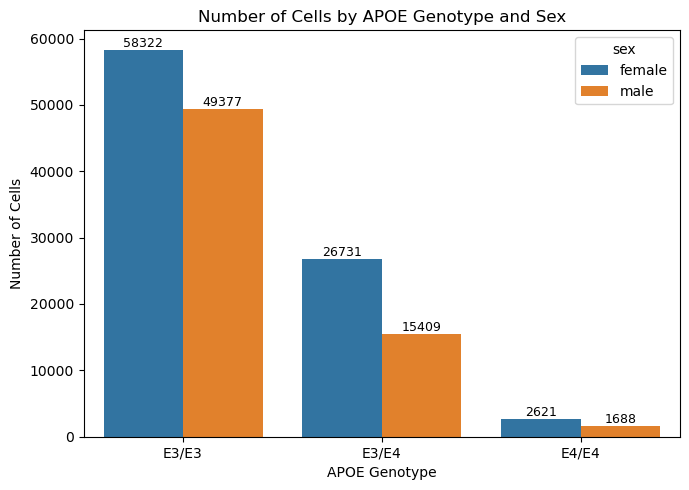

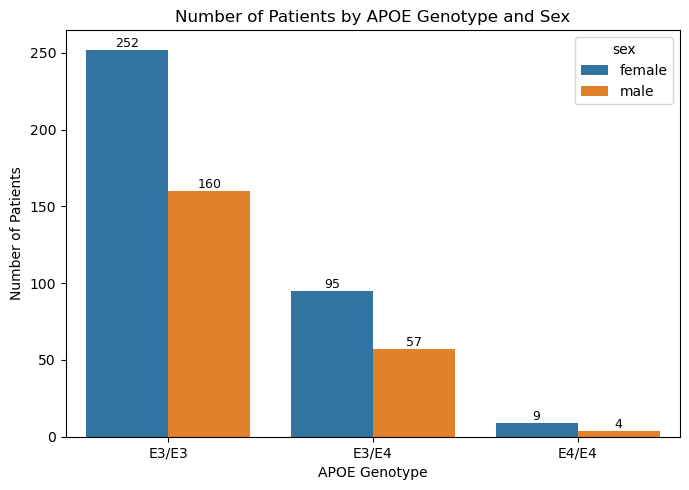

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# assume adata1, adata2, adata3 are loaded
adatas = [adata1, adata2, adata3]

# collect only metadata
meta = []
for i, A in enumerate(adatas, 1):
    df = A.obs[["apoe_genotype_std", "sex", "individualID"]].copy()
    df["source"] = f"adata{i}"   # optional, track origin
    meta.append(df)

# combine metadata without touching .X
meta_df = pd.concat(meta, axis=0)

# --- Number of cells ---
cell_counts = (
    meta_df.groupby(["apoe_genotype_std", "sex"])
    .size()
    .reset_index(name="n_cells")
)

# --- Number of patients (unique IDs) ---
patient_counts = (
    meta_df.groupby(["apoe_genotype_std", "sex"])["individualID"]
    .nunique()
    .reset_index(name="n_patients")
)

# --- Plot: Number of cells ---
plt.figure(figsize=(7,5))
ax = sns.barplot(data=cell_counts, x="apoe_genotype_std", y="n_cells", hue="sex")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)
plt.title("Number of Cells by APOE Genotype and Sex")
plt.ylabel("Number of Cells")
plt.xlabel("APOE Genotype")
plt.tight_layout()
plt.show()

# --- Plot: Number of patients ---
plt.figure(figsize=(7,5))
ax = sns.barplot(data=patient_counts, x="apoe_genotype_std", y="n_patients", hue="sex")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)
plt.title("Number of Patients by APOE Genotype and Sex")
plt.ylabel("Number of Patients")
plt.xlabel("APOE Genotype")
plt.tight_layout()
plt.show()


# Merge

adata1 and adata2 do not have raw data in adata.raw the raw data is in adata.X 
adata3 does have raw data

In [14]:
print(adata1.raw)
print(adata2.raw)
print(adata3.raw)

None
None
None


In [15]:
# Now for adata2 remove everything except UMIs layer and move it to the X without raw

# Create new AnnData from the UMIs layer
adata2_raw = ad.AnnData(
    X=adata2.layers["UMIs"].copy(),  # raw UMI counts
    obs=adata2.obs.copy(),           # keep cell metadata
    var=adata2.var.copy()            # keep gene metadata
)

#summarize_anndata_storage(adata2_raw)


In [16]:
print(adata2_raw) 

AnnData object with n_obs × n_vars = 38103 × 30872
    obs: 'sample_id', 'Neurotypical reference', 'Donor ID', 'Organism', 'Brain Region', 'Sex', 'Gender', 'Age at Death', 'Race (choice=White)', 'Race (choice=Black_ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian_ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)', 'specify other race', 'Hispanic_Latino', 'Highest level of education', 'Years of education', 'PMI', 'Fresh Brain Weight', 'Brain pH', 'Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Total Microinfarcts (not observed grossly)', 'Total microinfarcts in screening sections', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 'Cognitive Status', 'Last CASI Score', 'Interval from last CASI in months', 'Last MMSE Score', 'Interval from last MMSE in months', 'Last MOCA Score', 'Interval from last MOCA in mont

adata3 does not have gene names in the raw layer so have to take them from the Seurat object first and then attach them? 

In [18]:
print("adata1 example genes:", adata1.var_names[:5].tolist())
print("adata2 example genes:", adata2_raw.var_names[:5].tolist())
print("adata3 example genes:", adata3.var_names[:5].tolist())


adata1 example genes: ['MIR1302-2HG', 'AL627309.1', 'AL627309.2', 'AL627309.4', 'AL732372.1']
adata2 example genes: ['AL627309.1', 'AL627309.3', 'AL627309.5', 'AL627309.4', 'AL669831.2']
adata3 example genes: ['FAM87B', 'FAM41C', 'SAMD11', 'NOC2L', 'KLHL17']


In [21]:
print("adata1 genes:", len(adata1.var_names))
print("adata2 genes:", len(adata2_raw.var_names))
print("adata3 genes:", len(adata3.var_names))


adata1 genes: 30683
adata2 genes: 30872
adata3 genes: 18859


In [22]:
print(adata2_raw.layers.keys())

KeysView(Layers with keys: )


In [23]:

# 2. Intersection of genes
common_genes = (
    set(adata1.var_names)
    & set(adata2.var_names)
    & set(adata3.var_names)
)
common_genes = pd.Index(sorted(list(common_genes)))
print(f"Number of common genes: {len(common_genes)}")

adata1 = adata1[:, common_genes].copy()
adata2 = adata2[:, common_genes].copy()
adata3 = adata3[:, common_genes].copy()

# 3. Concatenate
merged = ad.concat(
    {"MIT_ROSMAP": adata1, "SEAAD": adata2, "FUJITA": adata3},
    label="dataset",
    join="inner"
)

print("merged shape:", merged.shape)
print("batches:", merged.obs["batch"].value_counts().to_dict())



Number of common genes: 17818


/home/ubuntu/miniconda3/envs/scvi-env/lib/python3.12/site-packages/anndata/_core/merge.py:1667: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concat_annot = pd.concat(
/home/ubuntu/miniconda3/envs/scvi-env/lib/python3.12/site-packages/anndata/_core/merge.py:1667: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concat_annot = pd.concat(


merged shape: (154148, 17818)
batches: {'IXFTU': 8151, 'Brain_region_PFC': 6846, 'IVA6E': 4697, 'GZQRZ': 4526, 'IXFTR': 4277, 'GZQS1': 4227, 'IT6MD': 4051, 'IXFTQ': 3906, 'IHLAS': 3478, 'J2CJJ': 2731, 'Last16': 2554, 'IT6ME': 2548, '190312Tsa': 2488, 'J2CJI': 2180, '1073_H02': 1098, '200311-B19-A': 939, '191213-B7-B': 927, '191213-B7-A': 890, '200313-B22-B': 876, '200313-B22-A': 818, '200311-B19-B': 805, '200701-B28-A': 793, '171013Tsa': 792, '826_F04': 722, '191219-B9-A': 719, '191219-B9-B': 717, '200715-B35-A': 713, '200701-B28-B': 712, '200227-B12-A': 701, '826_E04': 696, '200316-B24-B': 681, '190403-B4-B': 676, '190403-B4-A': 673, '200227-B12-B': 660, '200722-B38-B': 643, '191217-B8-A': 640, '984_A04': 638, '200306-B16-A': 637, '200306-B16-B': 636, '200225-B10-A': 633, '201007-B58-A': 623, '763_G06': 623, '200303-B14-B': 623, '201021-B60-A': 618, '190409-B5-B': 616, '200316-B24-A': 613, '201007-B58-B': 610, '200909-B51-B': 607, '200715-B35-B': 602, '763_H06': 598, '200225-B10-B': 5

In [29]:
print("dataset:", merged.obs["dataset"].value_counts().to_dict())


dataset: {'FUJITA': 58593, 'MIT_ROSMAP': 57452, 'SEAAD': 38103}


In [28]:

merged.obs["projid"] = pd.to_numeric(merged.obs["projid"], errors="coerce").astype("Int64")

for col in merged.obs.columns:
    if merged.obs[col].dtype == "object" or pd.api.types.is_categorical_dtype(merged.obs[col].dtype):
        merged.obs[col] = merged.obs[col].astype(str)

# Now write safely
merged.write_h5ad("merged_microglia.h5ad")



/tmp/ipykernel_12701/1452517447.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if merged.obs[col].dtype == "object" or pd.api.types.is_categorical_dtype(merged.obs[col].dtype):
/tmp/ipykernel_12701/1452517447.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if merged.obs[col].dtype == "object" or pd.api.types.is_categorical_dtype(merged.obs[col].dtype):
/tmp/ipykernel_12701/1452517447.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if merged.obs[col].dtype == "object" or pd.api.types.is_categorical_dtype(merged.obs[col].dtype):
/tmp/ipykernel_12701/1452517447.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinsta

# Check any potential missing age at death values

In [2]:
import scanpy as sc
import pandas as pd

# --- Load datasets ---
adata1 = sc.read_h5ad("/mnt/data/mit_pfc_mathysCell2023/PFC_micro.h5ad")
adata2 = sc.read_h5ad("/mnt/data/seaad_dlpfc/seaad_microglia_fixed.h5ad")
adata3 = sc.read_h5ad("/home/ubuntu/human_PFC/dejaeg_preprocessing/microglia_filt.h5ad")

# --- Standardize the relevant columns ---
datasets = {
    "MIT_PFC_Mathys": (adata1, "individualID", "age_death"),
    "SEAAD_DLPFC": (adata2, "Donor ID", "Age at Death"),
    "DEJAEG_Micro": (adata3, "individualID", "age_death"),
}

missing_summary = []

for name, (adata, id_col, age_col) in datasets.items():
    df = adata.obs.copy()
    
    if id_col not in df.columns:
        print(f"⚠️ {id_col} not found in {name}. Columns: {list(df.columns)[:10]}")
        continue
    if age_col not in df.columns:
        print(f"⚠️ {age_col} not found in {name}. Columns: {list(df.columns)[:10]}")
        continue
    
    # Select unique individuals and check missing values
    unique_df = df[[id_col, age_col]].drop_duplicates(subset=id_col)
    n_total = unique_df.shape[0]
    n_missing = unique_df[age_col].isna().sum()
    pct_missing = round((n_missing / n_total) * 100, 2)
    
    print(f"\n📊 Dataset: {name}")
    print(f"Total individuals: {n_total}")
    print(f"Missing age_death: {n_missing} ({pct_missing}%)")
    
    if n_missing > 0:
        print("Individuals with missing age_death:")
        print(unique_df[unique_df[age_col].isna()][id_col].tolist()[:10], "...")  # show up to 10 examples
    
    missing_summary.append({
        "dataset": name,
        "total_individuals": n_total,
        "missing_age_death": n_missing,
        "percent_missing": pct_missing
    })

# --- Create summary table ---
summary_df = pd.DataFrame(missing_summary)
print("\n✅ Summary:")
print(summary_df)



📊 Dataset: MIT_PFC_Mathys
Total individuals: 347
Missing age_death: 0 (0.0%)

📊 Dataset: SEAAD_DLPFC
Total individuals: 66
Missing age_death: 0 (0.0%)

📊 Dataset: DEJAEG_Micro
Total individuals: 369
Missing age_death: 0 (0.0%)

✅ Summary:
          dataset  total_individuals  missing_age_death  percent_missing
0  MIT_PFC_Mathys                347                  0              0.0
1     SEAAD_DLPFC                 66                  0              0.0
2    DEJAEG_Micro                369                  0              0.0


# Overalapping individualIDs

In [4]:
# --- Extract unique IDs (remove missing) ---
ids_mit = set(adata1.obs["individualID"].dropna().unique())
ids_dejaeg = set(adata3.obs["individualID"].dropna().unique())

# --- Find overlaps and differences ---
overlap = ids_mit.intersection(ids_dejaeg)
only_mit = ids_mit - ids_dejaeg
only_dejaeg = ids_dejaeg - ids_mit

# --- Print summary ---
print(f"🧠 Total MIT individuals: {len(ids_mit)}")
print(f"🧬 Total DEJAEG individuals: {len(ids_dejaeg)}")
print(f"🔁 Overlapping individuals: {len(overlap)}")
print(f"🧠 Total unique MIT individuals: {len(only_mit)}")
print(f"🧬 Total unique DEJAEG individuals: {len(only_dejaeg)}")

if overlap:
    print("\n✅ IDs that appear in both datasets:")
    for i, id_ in enumerate(sorted(overlap)):
        print(f"{i+1}. {id_}")



🧠 Total MIT individuals: 347
🧬 Total DEJAEG individuals: 369
🔁 Overlapping individuals: 205
🧠 Total unique MIT individuals: 142
🧬 Total unique DEJAEG individuals: 164

✅ IDs that appear in both datasets:
1. R1015854
2. R1028639
3. R1042566
4. R1103580
5. R1287407
6. R1521786
7. R1538032
8. R1609849
9. R1664857
10. R1721075
11. R1743384
12. R1830086
13. R1944372
14. R1969233
15. R1977848
16. R1980623
17. R2045909
18. R2140101
19. R2144127
20. R2157677
21. R2167020
22. R2264515
23. R2488731
24. R2494273
25. R2543886
26. R2575548
27. R2645096
28. R2667630
29. R2670295
30. R2678902
31. R2709337
32. R2787688
33. R2881301
34. R2895885
35. R2975126
36. R2992930
37. R3008520
38. R3035452
39. R3111222
40. R3121235
41. R3128463
42. R3201576
43. R3209518
44. R3211474
45. R3257830
46. R3322663
47. R3485645
48. R3579460
49. R3722356
50. R3727306
51. R3739042
52. R3740754
53. R3741788
54. R3744330
55. R3757880
56. R3825485
57. R3840906
58. R3857147
59. R3863249
60. R3864948
61. R3874626
62. R3877498

# Chemistry

In [7]:
# --- Define dataset column mappings ---
chemistry_columns = {
    "MIT_PFC_Mathys": ("chemistry", adata1),
    "SEAAD_DLPFC": ("method", adata2),
    "DEJAEG_Micro": ("batch", adata3),  # adjust if you have a different metadata column for chemistry
}

# --- Print chemistry summaries ---
for name, (col, adata) in chemistry_columns.items():
    print(f"\n🧫 Dataset: {name}")
    if col not in adata.obs.columns:
        print(f"⚠️ Column '{col}' not found. Available columns: {list(adata.obs.columns)[:10]}")
        continue

    # Drop missing values
    chem_values = adata.obs[col].dropna()
    unique_vals = chem_values.unique()
    counts = chem_values.value_counts()

    print(f"🔹 Unique chemistries: {len(unique_vals)}")
    print(counts)



🧫 Dataset: MIT_PFC_Mathys
🔹 Unique chemistries: 2
chemistry
10x 3' v3    54172
10x 3' v2     3280
Name: count, dtype: int64

🧫 Dataset: SEAAD_DLPFC
🔹 Unique chemistries: 2
method
10Xv3.1     35868
10xMulti     2235
Name: count, dtype: int64

🧫 Dataset: DEJAEG_Micro
🔹 Unique chemistries: 125
batch
200311-B19-A    939
191213-B7-B     927
191213-B7-A     890
200313-B22-B    876
200313-B22-A    818
               ... 
200708-B31-A     89
191121-B6        64
200709-B32-B     20
200709-B32-A     16
200309-B17-A      6
Name: count, Length: 125, dtype: int64


In [11]:
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

adata1 = sc.read_h5ad("/mnt/data/mit_pfc_mathysCell2023/PFC_micro.h5ad")
adata2 = sc.read_h5ad("/mnt/data/seaad_dlpfc/seaad_microglia_fixed.h5ad")


# --- Define dataset column mappings ---
chemistry_columns = {
    "MIT_PFC_Mathys": ("chemistry", adata1),
    "SEAAD_DLPFC": ("method", adata2),
}

# --- Create PDF to store plots ---
with PdfPages("chemistry_umaps.pdf") as pdf:
    for name, (col, adata) in chemistry_columns.items():
        print(f"\n🧫 Plotting {name} colored by '{col}'")

        if col not in adata.obs.columns:
            print(f"⚠️ Column '{col}' not found in {name}. Skipping.")
            continue

        # 🧩 Step 1: Ensure PCA exists
        if "X_pca" not in adata.obsm.keys():
            print(f"⚙️ Computing PCA for {name}...")
            sc.pp.normalize_total(adata)
            sc.pp.log1p(adata)
            sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True)
            sc.pp.scale(adata, max_value=10)
            sc.tl.pca(adata, svd_solver="arpack")

        # 🧩 Step 2: Ensure neighbors + UMAP exist
        if "neighbors" not in adata.uns or "X_umap" not in adata.obsm.keys():
            print(f"⚙️ Computing neighbors and UMAP for {name}...")
            sc.pp.neighbors(adata, use_rep="X_pca")
            sc.tl.umap(adata)

        # 🧩 Step 3: Plot UMAP colored by chemistry
        fig, ax = plt.subplots(figsize=(6, 5))
        sc.pl.umap(
            adata,
            color=col,
            title=f"{name} — colored by {col}",
            frameon=False,
            legend_loc="right margin",
            size=20,
            show=False,
            ax=ax
        )
        pdf.savefig(fig)
        plt.close(fig)


print("\n✅ All chemistry UMAPs saved to 'chemistry_umaps.pdf'")



🧫 Plotting MIT_PFC_Mathys colored by 'chemistry'
⚙️ Computing PCA for MIT_PFC_Mathys...


/home/ubuntu/miniconda3/envs/scvi-env-clean/lib/python3.10/functools.py:889: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


⚙️ Computing neighbors and UMAP for MIT_PFC_Mathys...

🧫 Plotting SEAAD_DLPFC colored by 'method'

✅ All chemistry UMAPs saved to 'chemistry_umaps.pdf'



🧫 MIT_PFC_Mathys: Found 2 chemistries → ['10x 3' v2', '10x 3' v3']
Categories (2, object): ['10x 3' v2', '10x 3' v3']

🧫 SEAAD_DLPFC: Found 2 chemistries → ['10Xv3.1', '10xMulti']
Categories (2, object): ['10Xv3.1', '10xMulti']


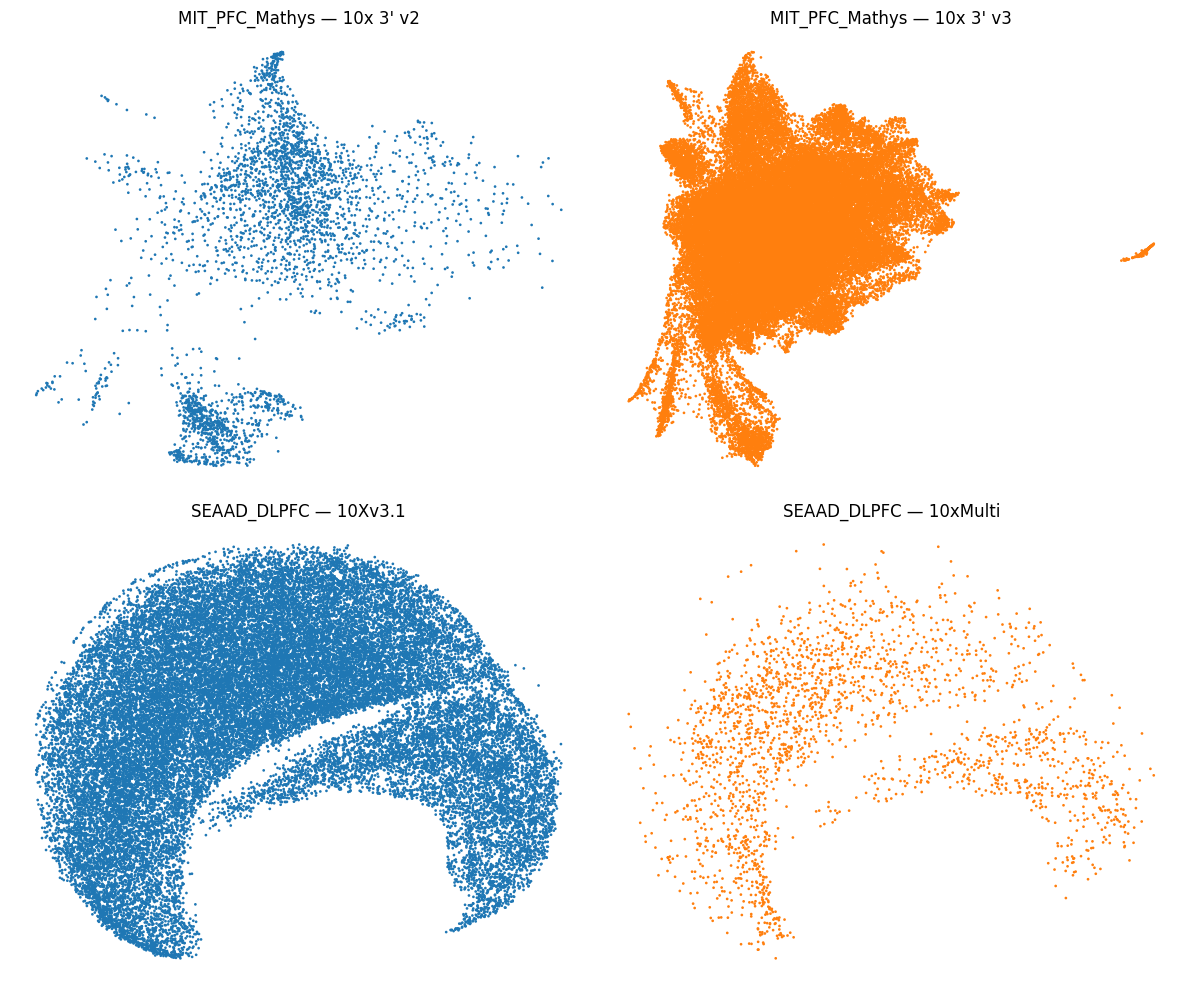


✅ Saved combined chemistry UMAPs to 'chemistry_umaps_split.pdf'


In [12]:


# --- Function to compute PCA + UMAP if missing ---
def ensure_umap(adata, dataset_name):
    if "X_pca" not in adata.obsm.keys():
        print(f"⚙️ Computing PCA for {dataset_name}...")
        sc.pp.normalize_total(adata)
        sc.pp.log1p(adata)
        sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True)
        sc.pp.scale(adata, max_value=10)
        sc.tl.pca(adata, svd_solver="arpack")

    if "neighbors" not in adata.uns or "X_umap" not in adata.obsm.keys():
        print(f"⚙️ Computing neighbors + UMAP for {dataset_name}...")
        sc.pp.neighbors(adata, use_rep="X_pca")
        sc.tl.umap(adata)

# --- Compute UMAPs if needed ---
for name, (col, adata) in chemistry_columns.items():
    ensure_umap(adata, name)

# --- Collect chemistries and make 2x2 layout ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

plot_idx = 0
for name, (col, adata) in chemistry_columns.items():
    if col not in adata.obs.columns:
        print(f"⚠️ Column '{col}' not found in {name}. Skipping.")
        continue
    
    unique_chems = adata.obs[col].dropna().unique()
    print(f"\n🧫 {name}: Found {len(unique_chems)} chemistries → {unique_chems}")

    # Limit to at most 2 per dataset (adjust grid if needed)
    for chem in unique_chems[:2]:
        ax = axes[plot_idx]
        subset = adata[adata.obs[col] == chem]
        sc.pl.umap(
            subset,
            color=col,
            title=f"{name} — {chem}",
            frameon=False,
            ax=ax,
            show=False,
            size=15,
            legend_loc=None,
        )
        plot_idx += 1

# --- Adjust layout ---
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("chemistry_umaps_split.pdf", bbox_inches="tight")
plt.show()

print("\n✅ Saved combined chemistry UMAPs to 'chemistry_umaps_split.pdf'")


In [13]:
# leiden clusters

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import scanpy as sc

# --- Define chemistry columns ---
chemistry_columns = {
    "MIT_PFC_Mathys": ("chemistry", adata1),
    "SEAAD_DLPFC": ("method", adata2),
}

# --- Run Leiden (fast, no recompute) ---
for name, (col, adata) in chemistry_columns.items():
    if "leiden" not in adata.obs.columns:
        print(f"⚙️ Running Leiden clustering for {name}...")
        sc.tl.leiden(adata, resolution=0.5)
        print(f"✅ Added Leiden clusters to {name}")

# --- Plot: 1 page per dataset, 2 UMAPs (one per chemistry) ---
with PdfPages("chemistry_leiden_umaps.pdf") as pdf:
    for name, (col, adata) in chemistry_columns.items():
        print(f"\n🧫 Plotting {name} by {col} and Leiden clusters...")

        if col not in adata.obs.columns:
            print(f"⚠️ Column '{col}' not found in {name}. Skipping.")
            continue

        unique_chems = sorted(adata.obs[col].dropna().unique())[:2]
        fig, axes = plt.subplots(1, len(unique_chems), figsize=(6 * len(unique_chems), 6))

        if len(unique_chems) == 1:
            axes = [axes]

        for ax, chem in zip(axes, unique_chems):
            subset = adata[adata.obs[col] == chem]
            sc.pl.umap(
                subset,
                color="leiden",
                title=f"{name} — {chem}",
                ax=ax,
                show=False,
                frameon=False,
                legend_loc="on data",
                size=15,
            )

        plt.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

print("\n✅ Saved Leiden + chemistry UMAPs to 'chemistry_leiden_umaps.pdf'")


⚙️ Running Leiden clustering for MIT_PFC_Mathys...


/tmp/ipykernel_23996/1259439753.py:17: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


✅ Added Leiden clusters to MIT_PFC_Mathys
⚙️ Running Leiden clustering for SEAAD_DLPFC...
✅ Added Leiden clusters to SEAAD_DLPFC

🧫 Plotting MIT_PFC_Mathys by chemistry and Leiden clusters...


/home/ubuntu/miniconda3/envs/scvi-env-clean/lib/python3.10/site-packages/scanpy/plotting/_utils.py:482: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/home/ubuntu/miniconda3/envs/scvi-env-clean/lib/python3.10/site-packages/scanpy/plotting/_utils.py:482: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list



🧫 Plotting SEAAD_DLPFC by method and Leiden clusters...


/home/ubuntu/miniconda3/envs/scvi-env-clean/lib/python3.10/site-packages/scanpy/plotting/_utils.py:482: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/home/ubuntu/miniconda3/envs/scvi-env-clean/lib/python3.10/site-packages/scanpy/plotting/_utils.py:482: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list



✅ Saved Leiden + chemistry UMAPs to 'chemistry_leiden_umaps.pdf'
